In [12]:
'''Gather data for beehive cluster'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT=100000
import gapipes as gp

In [13]:
plt.style.use('smoh')

In [15]:
tablelist = Vizier.get_catalogs('J/A+A/627/A4')
table = tablelist[0]
table[:3]

Source,RAICRS,DEICRS,Gmag,dvpar,vpero,pcont,_RA.icrs,_DE.icrs
,deg,deg,mag,km / s,km / s,,deg,deg
int64,float64,float64,float64,float32,float32,float32,float64,float64
504271599124398464,86.30707431,77.05543902,16.4161,3.75,-0.31,0.56,86.30707431,77.05543902
655146893925330816,121.09223987,16.00748291,16.5208,1.76,-0.92,1e-06,121.09223987,16.00748291
1091089819680643200,121.80070606,62.67365242,12.7950,-3.36,0.95,0.56,121.80070606,62.67365242


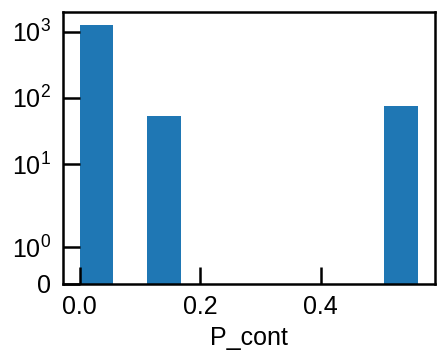

In [22]:
plt.subplots(1,1, figsize=(4,3))
plt.hist(table['pcont'],)
plt.yscale('symlog')
plt.xlabel('P_cont');

In [6]:
dr2 = gp.gaia.query_sourceid(table[['Source']], source_id_column='Source')

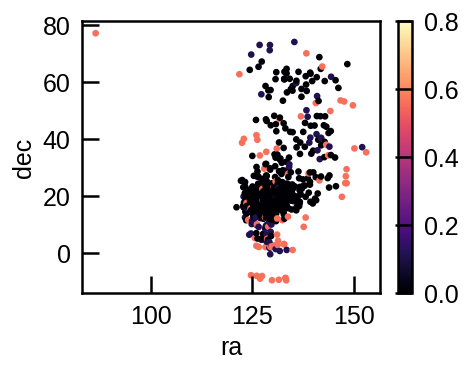

In [30]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
dr2.plot.scatter('ra','dec', s=9, c=table['pcont'], cmap='magma', vmax=.8, ax=ax);

In [32]:
dr2.to_csv('../data/beehive_dr2.csv', index=False)

In [34]:
import astropy.coordinates as coord
import astropy.units as u
coo = coord.Galactic(
    -141 * u.pc,
    -70 * u.pc,
    100 * u.pc,
    -43 * u.km / u.s,
    -20 * u.km / u.s,
    -9 * u.km / u.s,
    representation_type="cartesian",
    differential_type="cartesian",
)
coo_icrs = coo.transform_to(coord.ICRS)
coo_icrs.cartesian.xyz, coo_icrs.velocity.d_xyz

(<Quantity [-113.61680662,  134.48507108,   61.53037387] pc>,
 <Quantity [ 0.28645978, 48.23707469,  1.76141016] km / s>)